In [1]:
import plotly
import plotly.graph_objs as go
import plotly.offline as offline

offline.init_notebook_mode(connected=True)

In [2]:
import numpy as np
import pandas as pd

In [3]:
tourism_data = pd.read_csv('plotly_dataset/europe_tourism.csv')
tourism_data

,Year,Western,Eastern,Southern
0,1990,108.6,33.9,90.3
1,1995,112.2,58.9,96.0
2,2000,139.7,69.6,132.6
3,2005,141.7,95.3,156.4
4,2010,154.4,98.5,173.3
5,2015,181.4,121.4,225.5


In [4]:
western_trace = go.Scatter(
    x = tourism_data['Year'],
    y = tourism_data['Western'],
    name = 'Western Europe',
    line = dict(color = ('rgb(0, 250, 24)'),  # it has dash parameter its default value is solid lines
               width = 4)
)

In [5]:
eastern_trace = go.Scatter(
    x = tourism_data['Year'],
    y = tourism_data['Eastern'],
    name = 'Eastern Europe',
    line = dict(color = ('rgb(205, 12, 24)'),
                width = 4,
                dash='dot')
)

In [6]:
southern_trace = go.Scatter(
    x = tourism_data['Year'],
    y = tourism_data['Southern'],
    name = 'Southern Europe',
    line = dict(color = ('rgb(12, 240, 191)'),
                width = 4,
                dash='dash')
)

In [7]:
chart_data = [western_trace, eastern_trace, southern_trace]

In [8]:
chart_layout = dict(title = 'International Tourist Arrival (millions)',
                   xaxis = dict(title = 'Year'),
                   yaxis = dict(title = 'Tourists'),
                   )

In [9]:
fig = dict(data=chart_data, layout=chart_layout)

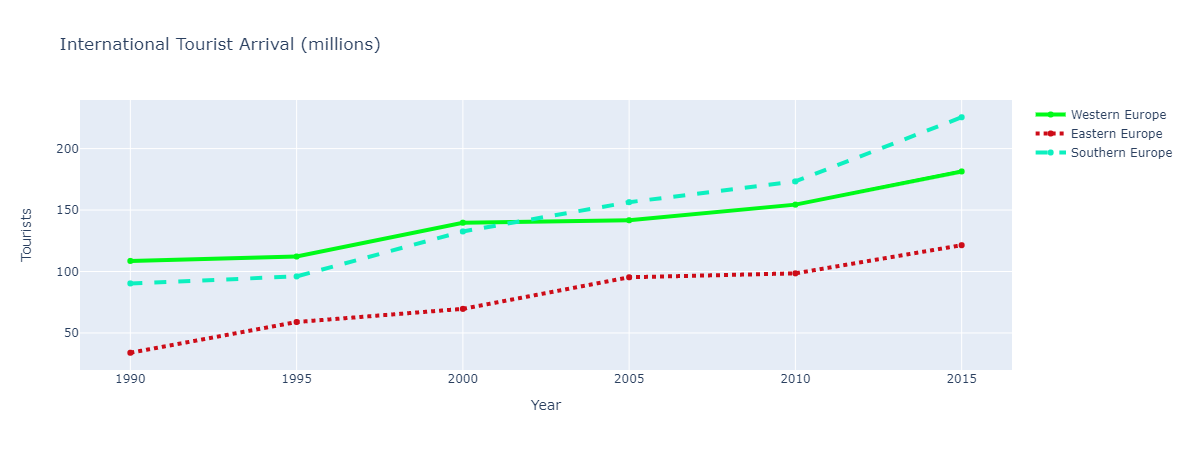

In [10]:
offline.iplot(fig)

In [11]:
tourism_data2 = tourism_data.copy()  # it performs deep copy
# lets artifically remove some entries from dataframe
# tourism_data['Western'][2] = None  
# tourism_data['Eastern'][2] = None
# tourism_data['Southern'][2] = None
# Above results in warning: <ipython-input-21-480898c8b302>:2: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
# Although it will update the df. However, performing operation on whis is undefined behaviors
tourism_data2.loc[2, 'Western'] = None
tourism_data2.loc[2, 'Eastern'] = None
tourism_data2.loc[2, 'Southern'] = None
tourism_data,tourism_data2
# Always use loc and iloc functions

(   Year  Western  Eastern  Southern
 0  1990    108.6     33.9      90.3
 1  1995    112.2     58.9      96.0
 2  2000    139.7     69.6     132.6
 3  2005    141.7     95.3     156.4
 4  2010    154.4     98.5     173.3
 5  2015    181.4    121.4     225.5,
    Year  Western  Eastern  Southern
 0  1990    108.6     33.9      90.3
 1  1995    112.2     58.9      96.0
 2  2000      NaN      NaN       NaN
 3  2005    141.7     95.3     156.4
 4  2010    154.4     98.5     173.3
 5  2015    181.4    121.4     225.5)

In [12]:
western_trace2 = go.Scatter(
    x = tourism_data2['Year'],
    y = tourism_data2['Western'],
    name = 'Western Europe',
    line = dict(color = ('rgb(0, 250, 24)'),  # it has dash parameter its default value is solid lines
               width = 4),
    connectgaps=True
)
eastern_trace2 = go.Scatter(
    x = tourism_data2['Year'],
    y = tourism_data2['Eastern'],
    name = 'Eastern Europe',
    line = dict(color = ('rgb(205, 12, 24)'),
                width = 4,
                dash='dot'),
    connectgaps=False  # Default value of connectgaps parameter is false
)
southern_trace2 = go.Scatter(
    x = tourism_data2['Year'],
    y = tourism_data2['Southern'],
    name = 'Southern Europe',
    line = dict(color = ('rgb(12, 240, 191)'),
                width = 4,
                dash='dash')
)
chart_data2 = [western_trace2, eastern_trace2, southern_trace2]
chart_layout2 = dict(title = 'International Tourist Arrival (millions)',
                   xaxis = dict(title = 'Year'),
                   yaxis = dict(title = 'Tourists'),
                   )
fig2 = dict(data=chart_data2, layout=chart_layout2)

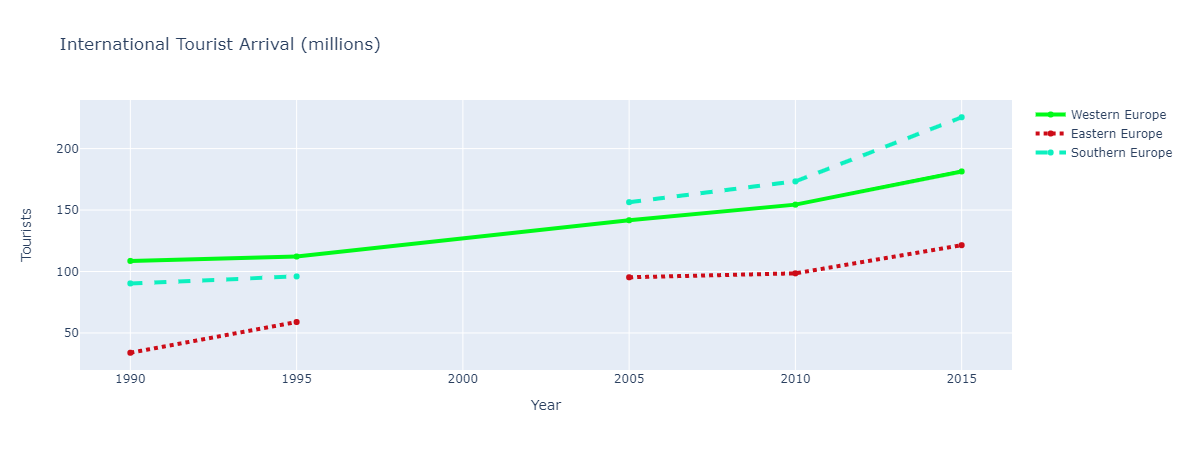

In [13]:
offline.iplot(fig2)  # Chagnes reflected in new figure

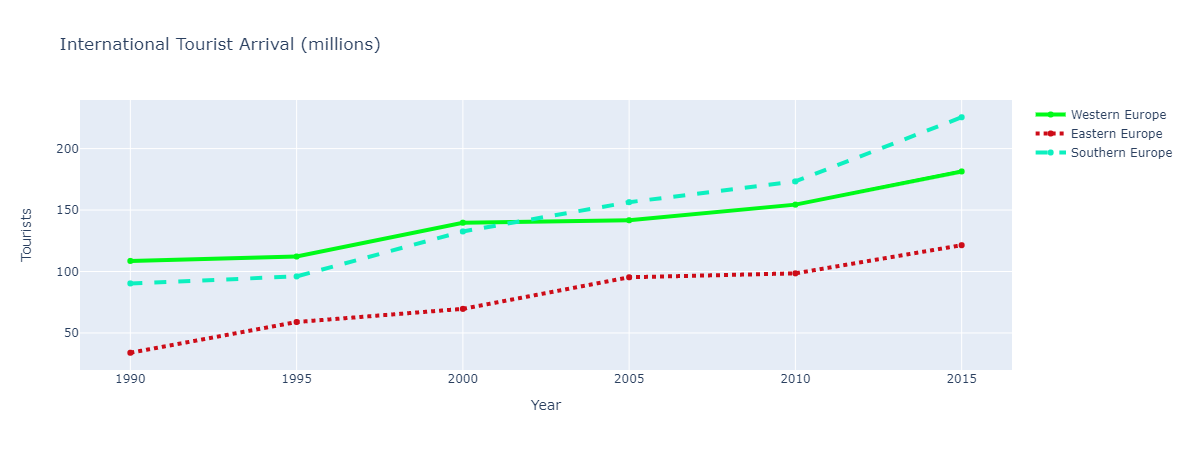

In [14]:
offline.iplot(fig)  # no changes in original figure

In [15]:
annotations = []
annotations.append(dict(x = tourism_data.loc[0, 'Year'],  # it tells the x co-ordinate of annotation
                        y = tourism_data.loc[0, 'Western'], # it tells the y co-ordinate of annotation
                        # Combination of both x,y is start of the line for Western Trace
                        xanchor='right',
                        yanchor='middle',
                        
                        text=str(tourism_data.loc[0, 'Western']) + 'M', # it display the text value in annotation
                        font=dict(family = 'Ariel',
                                  size = 16,
                                  color = 'grey'
                                 ),
                        showarrow = False
                       ))
annotations.append(dict(x = tourism_data.loc[5, 'Year'],
                        y = tourism_data.loc[5, 'Eastern'],
                        # Combination of both x,y is end of the line for Eastern Trace
                        xanchor='left',
                        yanchor='bottom',
                        
                        text=str(tourism_data.loc[5, 'Eastern']) + 'M',
                        font=dict(family = 'Ariel',
                                  size = 16,
                                  color = 'grey'
                                 ),
                        showarrow = True,
                        arrowcolor = 'grey'
                       ))
annotations.append(dict(yref = 'paper',
                        x = 2000,
                        y = 0.8,
                        
                        text= 'Data missing for year 2000',
                        font=dict(family = 'Times New Roman',
                                  size = 20,
                                  color = 'white'
                                 ),
                        showarrow = False,
                        bgcolor = 'purple'
                       ))

In [16]:
# annotation can be added to any layout
chart_layout2['annotations'] = annotations

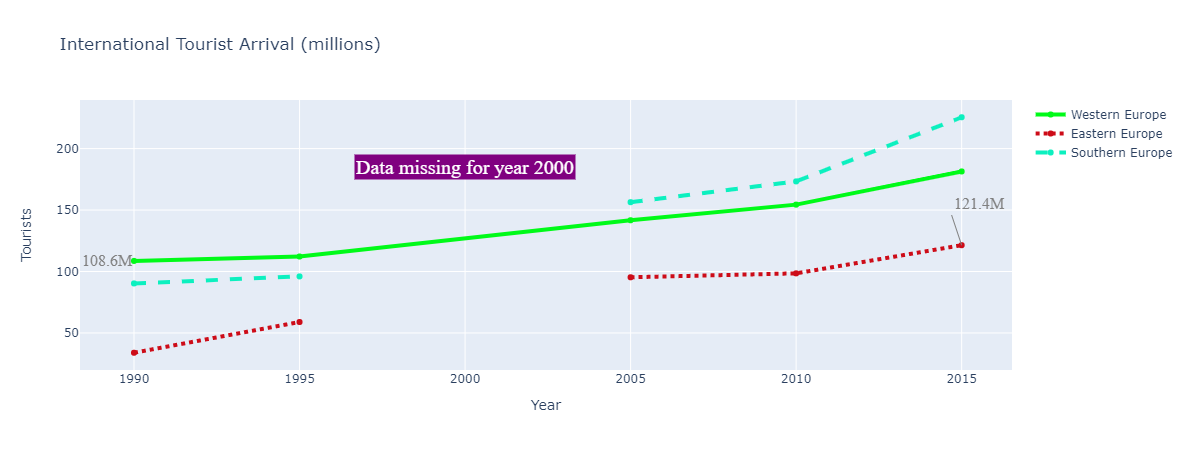

In [17]:
anno_fig = dict(data= chart_data2,
                layout=chart_layout2
               )
offline.iplot(anno_fig)